<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/financial-investment-doc/blob/main/AI_Stock_Technical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 기술적 분석 (Technical Analysis)
  - 기술적 분석은 주식의 과거 가격과 거래량 데이터를 기반으로 미래의 가격 변동을 예측하는 방법입니다.

  - 주요 기술적 분석 지표:
    - 이동 평균 (Moving Averages): 주가의 추세를 파악하는 데 유용합니다. 일반적으로 50일, 200일 이동 평균이 자주 사용됩니다.
    - 상대 강도 지수 (RSI, Relative Strength Index): 과매수 또는 과매도 상태를 파악하는 데 사용됩니다. RSI 값이 70 이상이면 과매수, 30 이하이면 과매도 상태를 의미합니다.
    - MACD (Moving Average Convergence Divergence): 추세의 강도와 방향을 분석하는 데 사용됩니다.
    - 볼린저 밴드 (Bollinger Bands): 주가의 변동성을 나타내며, 주가가 밴드의 상단에 가까워질수록 과매수, 하단에 가까워질수록 과매도 상태를 의미합니다.

[*********************100%%**********************]  3 of 3 completed


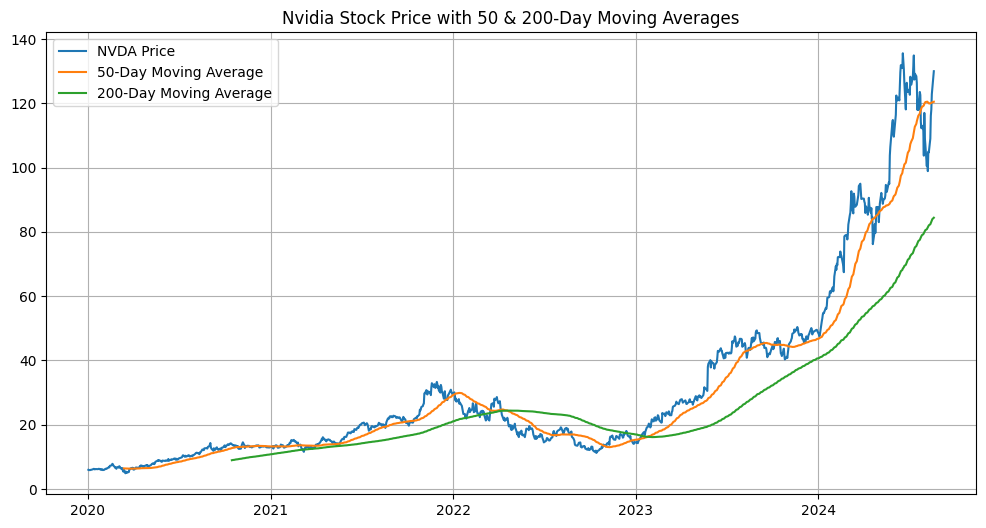

In [9]:
import yfinance as yf
import matplotlib.pyplot as plt

# AI 관련 주식 (예: Nvidia, Google, Microsoft 등)
tickers = ['NVDA', 'GOOGL', 'MSFT']

# 주식 데이터 다운로드
data = yf.download(tickers, start="2020-01-01", end="2024-08-20")['Adj Close']

# 50일, 200일 이동 평균 계산
data['NVDA_50_MA'] = data['NVDA'].rolling(window=50).mean()
data['NVDA_200_MA'] = data['NVDA'].rolling(window=200).mean()

# 기술적 분석 차트 생성
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['NVDA'], label='NVDA Price')
plt.plot(data.index, data['NVDA_50_MA'], label='50-Day Moving Average')
plt.plot(data.index, data['NVDA_200_MA'], label='200-Day Moving Average')
plt.title('Nvidia Stock Price with 50 & 200-Day Moving Averages')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
import pandas as pd


data = yf.download('NVDA', start='2020-01-01', end='2024-08-20')

# 50일 및 200일 이동 평균 계산
data['50_MA'] = data['Adj Close'].rolling(window=50).mean()
data['200_MA'] = data['Adj Close'].rolling(window=200).mean()

# 골든 크로스와 데드 크로스 지점 찾기
data['Golden_Cross'] = (data['50_MA'] > data['200_MA']) & (data['50_MA'].shift(1) <= data['200_MA'].shift(1))
data['Death_Cross'] = (data['50_MA'] < data['200_MA']) & (data['50_MA'].shift(1) >= data['200_MA'].shift(1))

print(data[['50_MA', '200_MA', 'Golden_Cross', 'Death_Cross']].tail())

print(data[data['Golden_Cross']==True])
print(data[data['Death_Cross']==True])

[*********************100%%**********************]  1 of 1 completed

                 50_MA     200_MA  Golden_Cross  Death_Cross
Date                                                        
2024-08-13  120.083681  82.744739         False        False
2024-08-14  120.145470  83.133553         False        False
2024-08-15  120.274122  83.545397         False        False
2024-08-16  120.317123  83.962537         False        False
2024-08-19  120.497361  84.408681         False        False
              Open       High    Low      Close  Adj Close     Volume  \
Date                                                                    
2023-01-24  18.827  19.495001  18.82  19.264999  19.253969  496204000   

                50_MA   200_MA  Golden_Cross  Death_Cross  
Date                                                       
2023-01-24  16.235738  16.2274          True        False  
              Open   High        Low   Close  Adj Close     Volume      50_MA  \
Date                                                                            
2022-04-20 

In [4]:
# RSI 계산 (14일 기준)
delta = data['Adj Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# MACD 계산
data['12_EMA'] = data['Adj Close'].ewm(span=12, adjust=False).mean()
data['26_EMA'] = data['Adj Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['12_EMA'] - data['26_EMA']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

print(data[['RSI', 'MACD', 'Signal_Line']].tail())


                  RSI      MACD  Signal_Line
Date                                        
2024-08-13  51.374545 -3.544550    -3.902908
2024-08-14  54.220026 -2.574499    -3.637227
2024-08-15  56.738177 -1.403838    -3.190549
2024-08-16  58.900924 -0.333447    -2.619129
2024-08-19  68.623281  0.941342    -1.907034


1. RSI (Relative Strength Index) 분석:

  - RSI 값:

    - 2024-08-13: 51.37
    - 2024-08-14: 54.22
    - 2024-08-15: 56.74
    - 2024-08-16: 58.90
    - 2024-08-19: 68.62

  - 분석:

    - RSI는 50 이하에서는 과매도 상태로부터 회복 중인 것으로 볼 수 있으며, 50을 넘어서면서 주가가 강세를 보이고 있습니다.
    - 2024-08-19 기준 RSI가 68.62로 상승하면서 과매수 영역(70 이상)에 근접하고 있습니다. 이는 주가가 단기적으로 과열될 수 있음을 시사하며, 가까운 미래에 조정이 발생할 가능성을 암시합니다.

2. MACD 및 시그널 라인 분석:
  
  - MACD 값과 시그널 라인:

    - 2024-08-13: MACD = -3.54, 시그널 라인 = -3.90
    - 2024-08-14: MACD = -2.57, 시그널 라인 = -3.64
    - 2024-08-15: MACD = -1.40, 시그널 라인 = -3.19
    - 2024-08-16: MACD = -0.33, 시그널 라인 = -2.62
    - 2024-08-19: MACD = 0.94, 시그널 라인 = -1.91
  
  - 분석:

    - MACD가 시그널 라인보다 낮았지만, 최근 며칠간 상승하면서 2024-08-19에는 MACD가 시그널 라인을 상회하는 골든 크로스가 발생했습니다.
    - 이는 매수 신호로 해석될 수 있으며, 단기적으로 주가가 상승할 가능성이 있음을 시사합니다.
    - MACD가 시그널 라인을 상승 돌파한 것은 주가의 긍정적인 모멘텀을 반영합니다. 특히 2024-08-19에 시그널 라인을 넘어서면서 더 강한 상승세가 예고될 수 있습니다.

3. 종합적 분석:

  - RSI와 MACD의 조합:

    - RSI가 68.62로 과매수 영역에 근접하고 있으나, 아직 과매수 신호는 아닙니다. 그러나 계속해서 상승할 경우, 조정이 발생할 가능성을 염두에 두어야 합니다.
    - MACD가 시그널 라인을 상회하면서 상승 신호를 주고 있기 때문에, 현재 주가는 상승세를 유지할 가능성이 큽니다. 그러나 RSI가 70 이상으로 진입하면 주가가 조정받을 수 있으므로 주의가 필요합니다.
  
  - 투자 전략:

    - 단기 투자자: MACD의 상승 신호를 바탕으로 주가가 단기적으로 추가 상승할 가능성을 고려하여 매수 전략을 취할 수 있습니다.
    - 장기 투자자: RSI가 과매수 상태에 근접해 있기 때문에, 추가 상승 시 수익 실현을 고려할 수도 있습니다. 그러나 장기적인 추세를 고려한다면, MACD와 시그널 라인의 긍정적인 신호를 주시하면서 계속 보유할 수도 있습니다.

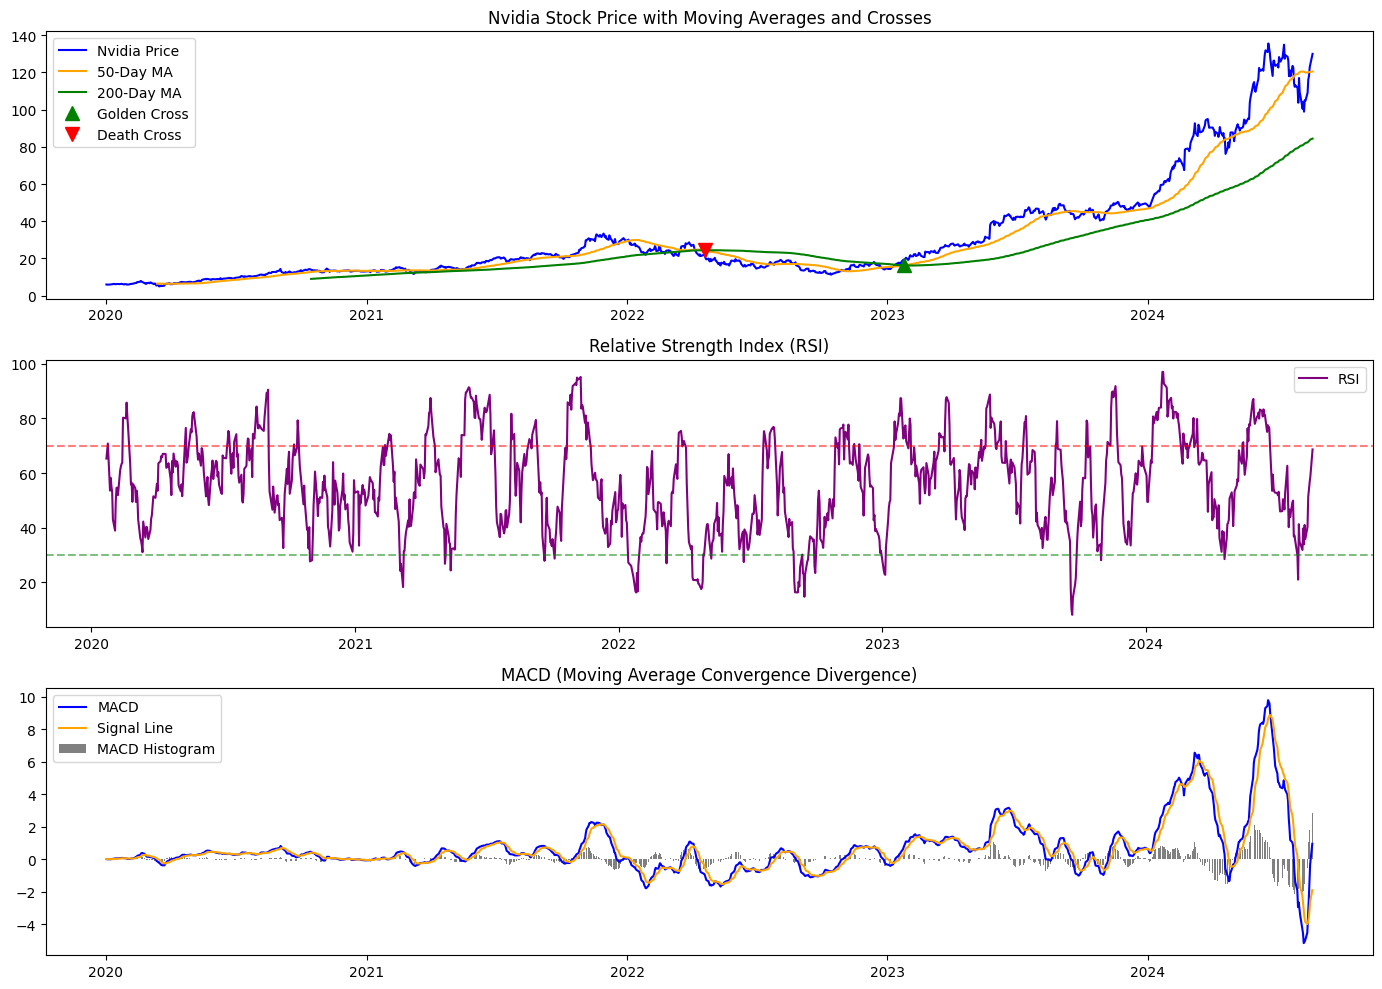

In [5]:
plt.figure(figsize=(14, 10))

# 1. 주가 및 이동 평균, 골든 크로스와 데드 크로스 표시
plt.subplot(3, 1, 1)
plt.plot(data['Adj Close'], label='Nvidia Price', color='blue')
plt.plot(data['50_MA'], label='50-Day MA', color='orange')
plt.plot(data['200_MA'], label='200-Day MA', color='green')

# 골든 크로스 표시
plt.plot(data[data['Golden_Cross']].index, data['50_MA'][data['Golden_Cross']], '^', markersize=10, color='g', lw=0, label='Golden Cross')

# 데드 크로스 표시
plt.plot(data[data['Death_Cross']].index, data['50_MA'][data['Death_Cross']], 'v', markersize=10, color='r', lw=0, label='Death Cross')

plt.title('Nvidia Stock Price with Moving Averages and Crosses')
plt.legend()

# 2. RSI 그래프
plt.subplot(3, 1, 2)
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title('Relative Strength Index (RSI)')
plt.legend()

# 3. MACD 그래프
plt.subplot(3, 1, 3)
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['Signal_Line'], label='Signal Line', color='orange')
plt.bar(data.index, data['MACD'] - data['Signal_Line'], label='MACD Histogram', color='gray')
plt.title('MACD (Moving Average Convergence Divergence)')
plt.legend()

plt.tight_layout()
plt.show()


1. Nvidia 주가와 이동 평균

  - 50일 이동 평균(주황색)과 200일 이동 평균(녹색)
  - 이 두 이동 평균은 주가의 중기 및 장기 추세를 나타냅니다.
  - 골든 크로스(녹색 삼각형): 50일 이동 평균이 200일 이동 평균을 아래에서 위로 교차할 때 발생하며, 강력한 상승 신호로 간주됩니다.
  - 데드 크로스(빨간색 삼각형): 50일 이동 평균이 200일 이동 평균을 위에서 아래로 교차할 때 발생하며, 하락 신호로 간주됩니다.
  - 그래프에서는 2022년 중반에 데드 크로스가 발생했으나, 2023년 초에 골든 크로스가 발생하면서 강한 상승세로 전환된 것을 확인할 수 있습니다.

2. RSI (Relative Strength Index)
  - RSI 지표(보라색)
  - 70 이상(빨간색 점선): 과매수 상태를 나타내며, 주가가 너무 빠르게 상승하여 곧 하락할 가능성이 있음을 시사합니다.
  - 30 이하(초록색 점선): 과매도 상태를 나타내며, 주가가 너무 많이 하락하여 반등할 가능성이 있음을 시사합니다.
  - 그래프에서는 RSI가 70 이상으로 올라가는 시점에 주가의 조정이 발생하는 것을 확인할 수 있으며, 30 이하로 내려간 후에는 주가가 반등하는 경향이 있습니다.

3. MACD (Moving Average Convergence Divergence)
  - MACD(파란색)와 시그널 라인(주황색)
  - MACD와 시그널 라인의 교차점은 매매 신호로 간주됩니다.
  - MACD가 시그널 라인을 위로 교차할 때: 매수 신호로 해석됩니다.
  - MACD가 시그널 라인을 아래로 교차할 때: 매도 신호로 해석됩니다.
  - 그래프에서 MACD 히스토그램(회색 막대)은 두 선 간의 차이를 시각화하여 추세의 강도를 보여줍니다. 양의 히스토그램은 상승 추세, 음의 히스토그램은 하락 추세를 시사합니다.

4. 종합 분석
  - 골든 크로스와 MACD:

    - 골든 크로스와 MACD의 상승 교차는 강력한 매수 신호를 제공할 수 있습니다.
    - 반대로, 데드 크로스와 MACD의 하락 교차는 주가 하락의 신호로 사용할 수 있습니다.

  - RSI와 MACD의 조합:

    - RSI가 과매수 상태에 있고 MACD가 하락 교차를 나타내는 경우, 매도 신호로 해석할 수 있습니다.
    - RSI가 과매도 상태에 있고 MACD가 상승 교차를 나타내는 경우, 매수 신호로 해석할 수 있습니다.

In [2]:
import yfinance as yf

ticker = 'NVDA'

stock = yf.Ticker(ticker)

print("P/E Ratio:", stock.info['trailingPE'])
print("EPS:", stock.info['trailingEps'])
print("Revenue:", stock.info['totalRevenue'])
print("Free Cash Flow:", stock.info['freeCashflow'])


P/E Ratio: 73.7076
EPS: 1.71
Revenue: 79773999104
Free Cash Flow: 29023750144


2. 기본적 분석 (Fundamental Analysis)
  - 기본적 분석은 기업의 재무 상태, 산업의 상태, 경제 상황 등을 바탕으로 주식의 내재 가치를 평가하는 방법입니다.

  - 주요 지표:
    - P/E Ratio (주가수익비율): 주가를 주당순이익(EPS)으로 나눈 값으로, 기업의 가치를 평가하는 데 사용됩니다.
    - EPS (주당순이익): 기업의 순이익을 주식 수로 나눈 값으로, 기업의 수익성을 평가하는 데 사용됩니다.
    - Revenue (매출): 기업의 총 매출액을 분석하여 성장 가능성을 평가합니다.
    - Free Cash Flow (자유 현금 흐름): 기업이 창출한 현금 흐름에서 운영 비용과 자본 지출을 제외한 금액으로, 기업의 재정 상태를 평가하는 데 사용됩니다.

In [10]:
tickers = ['GOOGL', 'MSFT', 'META', 'TSLA']

stock_data = {}

for ticker in tickers:
    data = yf.download(ticker, start='2020-01-01', end='2024-08-20')

    data['50_MA'] = data['Adj Close'].rolling(window=50).mean()
    data['200_MA'] = data['Adj Close'].rolling(window=200).mean()

    data['Golden_Cross'] = (data['50_MA'] > data['200_MA']) & (data['50_MA'].shift(1) <= data['200_MA'].shift(1))
    data['Death_Cross'] = (data['50_MA'] < data['200_MA']) & (data['50_MA'].shift(1) >= data['200_MA'].shift(1))

    # RSI 계산 (14일 기준)
    delta = data['Adj Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

    # MACD 계산
    data['12_EMA'] = data['Adj Close'].ewm(span=12, adjust=False).mean()
    data['26_EMA'] = data['Adj Close'].ewm(span=26, adjust=False).mean()
    data['MACD'] = data['12_EMA'] - data['26_EMA']
    data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

    stock_data[ticker] = data

for ticker in tickers:
    print(f"{ticker} Data:")
    print(stock_data[ticker][['RSI', 'MACD', 'Signal_Line']].tail())
    print("\n")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

GOOGL Data:
                  RSI      MACD  Signal_Line
Date                                        
2024-08-13  36.786277 -4.751796    -4.288075
2024-08-14  38.668418 -4.790527    -4.388565
2024-08-15  40.847798 -4.692091    -4.449270
2024-08-16  39.147697 -4.429075    -4.445231
2024-08-19  44.551488 -3.876581    -4.331501


MSFT Data:
                  RSI       MACD  Signal_Line
Date                                         
2024-08-13  39.606325 -10.045304    -9.511965
2024-08-14  48.796497  -8.893721    -9.388316
2024-08-15  47.194407  -7.497652    -9.010183
2024-08-16  44.056587  -6.522638    -8.512674
2024-08-19  49.494981  -5.440304    -7.898200


META Data:
                  RSI       MACD  Signal_Line
Date                                         
2024-08-13  73.032954   5.789333    -0.450079
2024-08-14  76.205816   7.450814     1.130099
2024-08-15  75.909744   9.510826     2.806245
2024-08-16  70.829686  10.225866     4.290169
2024-08-19  72.407961  10.817928     5.595721


T

1. GOOGL (Alphabet Inc.) 분석
  - RSI 값:

    - RSI가 36.78에서 44.55로 상승하고 있으며, 이는 주가가 과매도 상태에서 회복 중임을 시사합니다.
    - RSI가 50 이하에 머물러 있어 아직 완전히 강세장으로 전환되지 않았습니다.

  - MACD 값과 시그널 라인:

    - MACD가 시그널 라인보다 낮으며, 이는 현재 약세장이 유지되고 있음을 나타냅니다.
    - 다만, MACD와 시그널 라인의 차이가 줄어들고 있어 하락세가 완화되고 있음을 시사합니다.

  - 종합 분석:

    - 현재 GOOGL은 과매도 상태에서 회복 중이나, MACD가 여전히 시그널 라인 아래에 있어 강력한 매수 신호는 아직 아닙니다.
    - 추가 상승을 기대하는 투자자라면, MACD가 시그널 라인을 상향 돌파하는 시점을 기다리는 것이 좋습니다.

2. MSFT (Microsoft Corp.) 분석
  - RSI 값:

    - RSI가 39.61에서 49.49로 상승 중이며, 이는 주가가 과매도 상태에서 벗어나고 있음을 시사합니다.
    - RSI가 50에 가까워지면서 곧 강세 전환이 예상될 수 있습니다.

  - MACD 값과 시그널 라인:

    - MACD가 시그널 라인보다 낮지만, MACD가 지속적으로 상승하고 있으며 시그널 라인과의 차이가 줄어들고 있습니다.
    - 이는 하락세가 약화되고 있음을 의미하며, 곧 매수 신호로 전환될 가능성이 있습니다.

  - 종합 분석:

    - MSFT는 과매도 상태에서 회복 중이며, MACD가 시그널 라인을 상향 돌파할 경우 강력한 매수 신호가 될 수 있습니다.
    - RSI가 50을 넘어서면 추가 상승 가능성이 높아집니다.

3. META (Meta Platforms, Inc.) 분석
  - RSI 값:

    - RSI가 73.03에서 72.41로 유지되고 있어 과매수 상태에 있습니다.
    - 이는 주가가 단기적으로 과열된 상태일 수 있으며, 조정이 발생할 가능성이 있습니다.
  
  - MACD 값과 시그널 라인:

    - MACD가 시그널 라인보다 훨씬 높으며, 이는 강한 상승 모멘텀이 지속되고 있음을 나타냅니다.
    - 그러나 RSI가 과매수 상태에 있다는 점을 고려하면, 조정 가능성도 염두에 두어야 합니다.

  - 종합 분석:

    - META는 현재 강한 상승세에 있으며, MACD가 시그널 라인 위에 있어 긍정적인 매수 신호를 유지하고 있습니다.
    - 그러나 RSI가 과매수 상태에 있어 조정 가능성을 주시할 필요가 있습니다. 추가 상승이 기대되지만, 조정 시점을 대비할 필요가 있습니다.

4. TSLA (Tesla, Inc.) 분석

  - RSI 값:

    - RSI가 45.95에서 50.05로 상승 중이며, 주가가 과매도 상태에서 회복 중임을 시사합니다.
    - RSI가 50을 넘어서면서 강세 전환 가능성을 보여줍니다.
  
  - MACD 값과 시그널 라인:

    - MACD가 시그널 라인보다 낮지만, MACD가 상승하고 있어 하락세가 약화되고 있음을 나타냅니다.
    - MACD가 시그널 라인과의 차이를 줄이고 있으며, 곧 매수 신호로 전환될 가능성이 있습니다.

  - 종합 분석:

    - TSLA는 과매도 상태에서 회복 중이며, MACD가 시그널 라인을 상향 돌파할 경우 매수 신호가 될 수 있습니다.
    - RSI가 50을 넘어서면 추가 상승 가능성이 높아집니다.

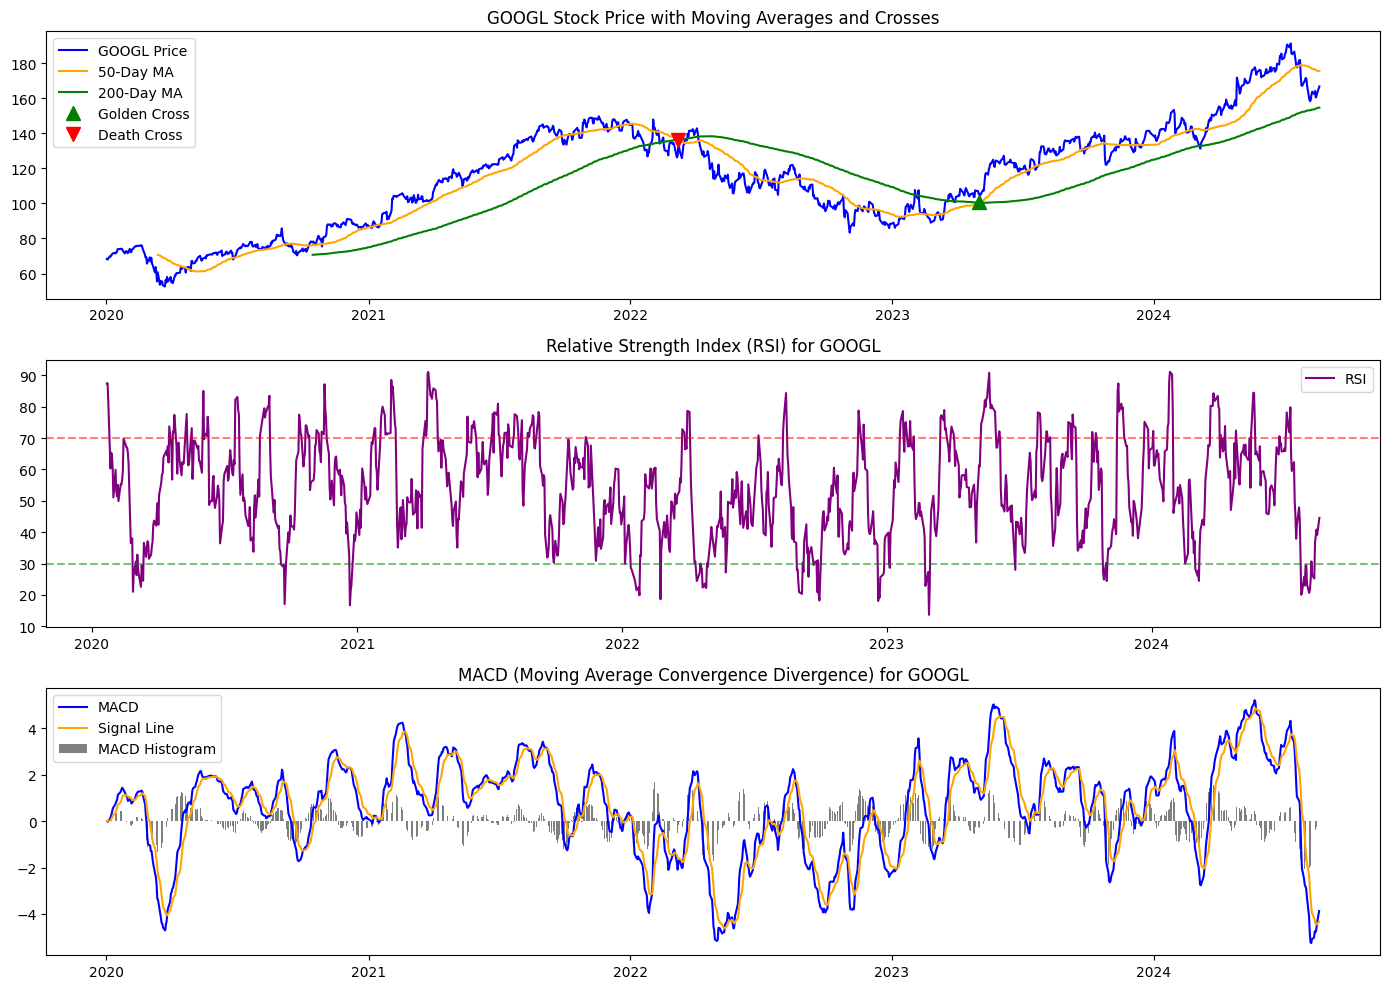

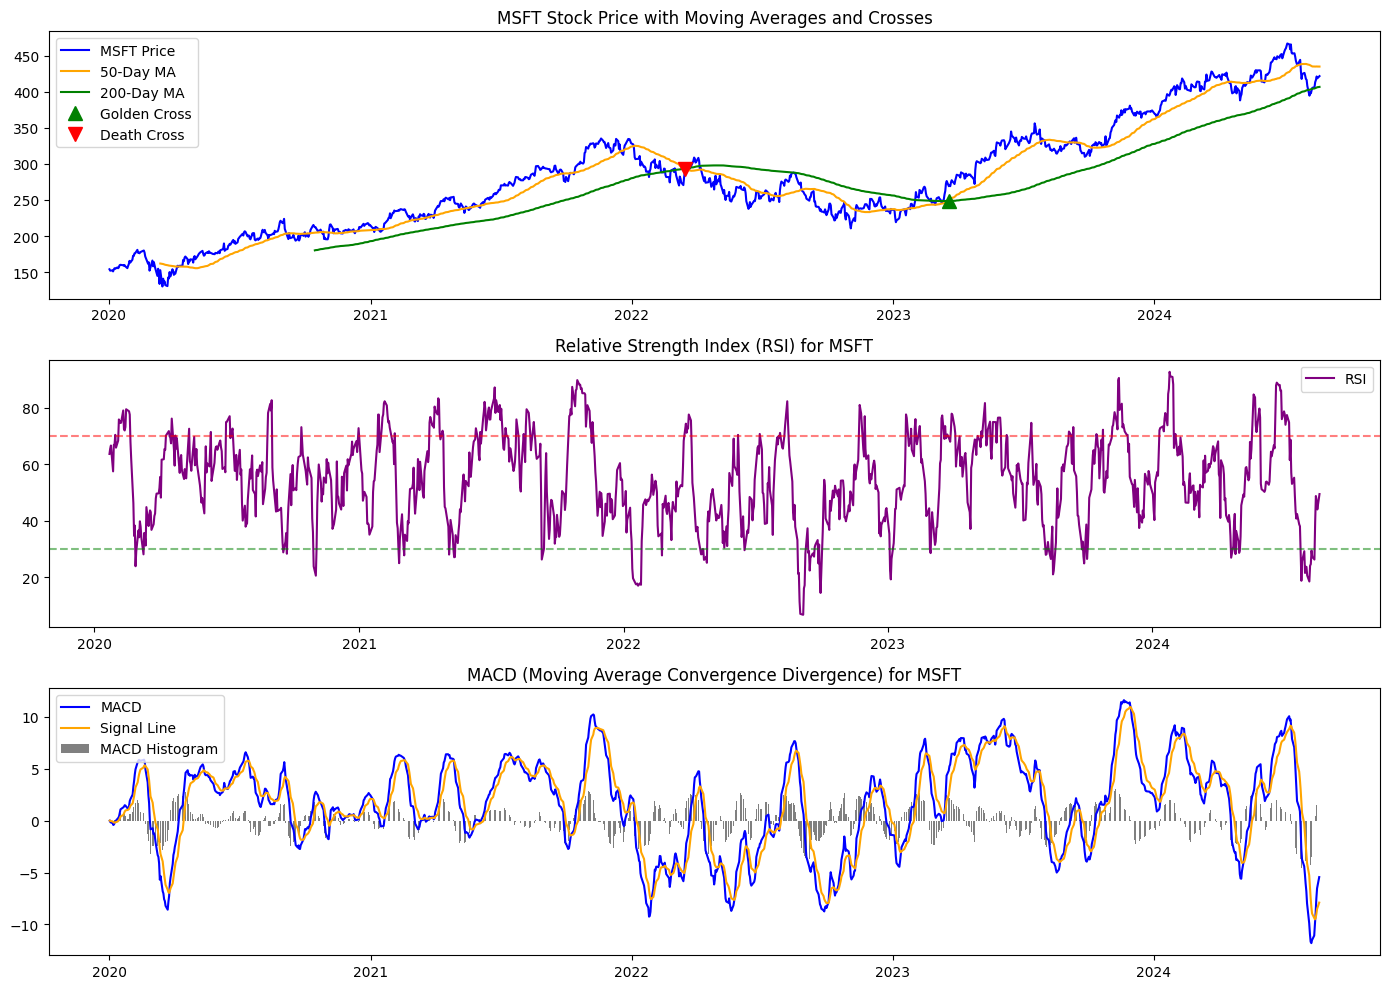

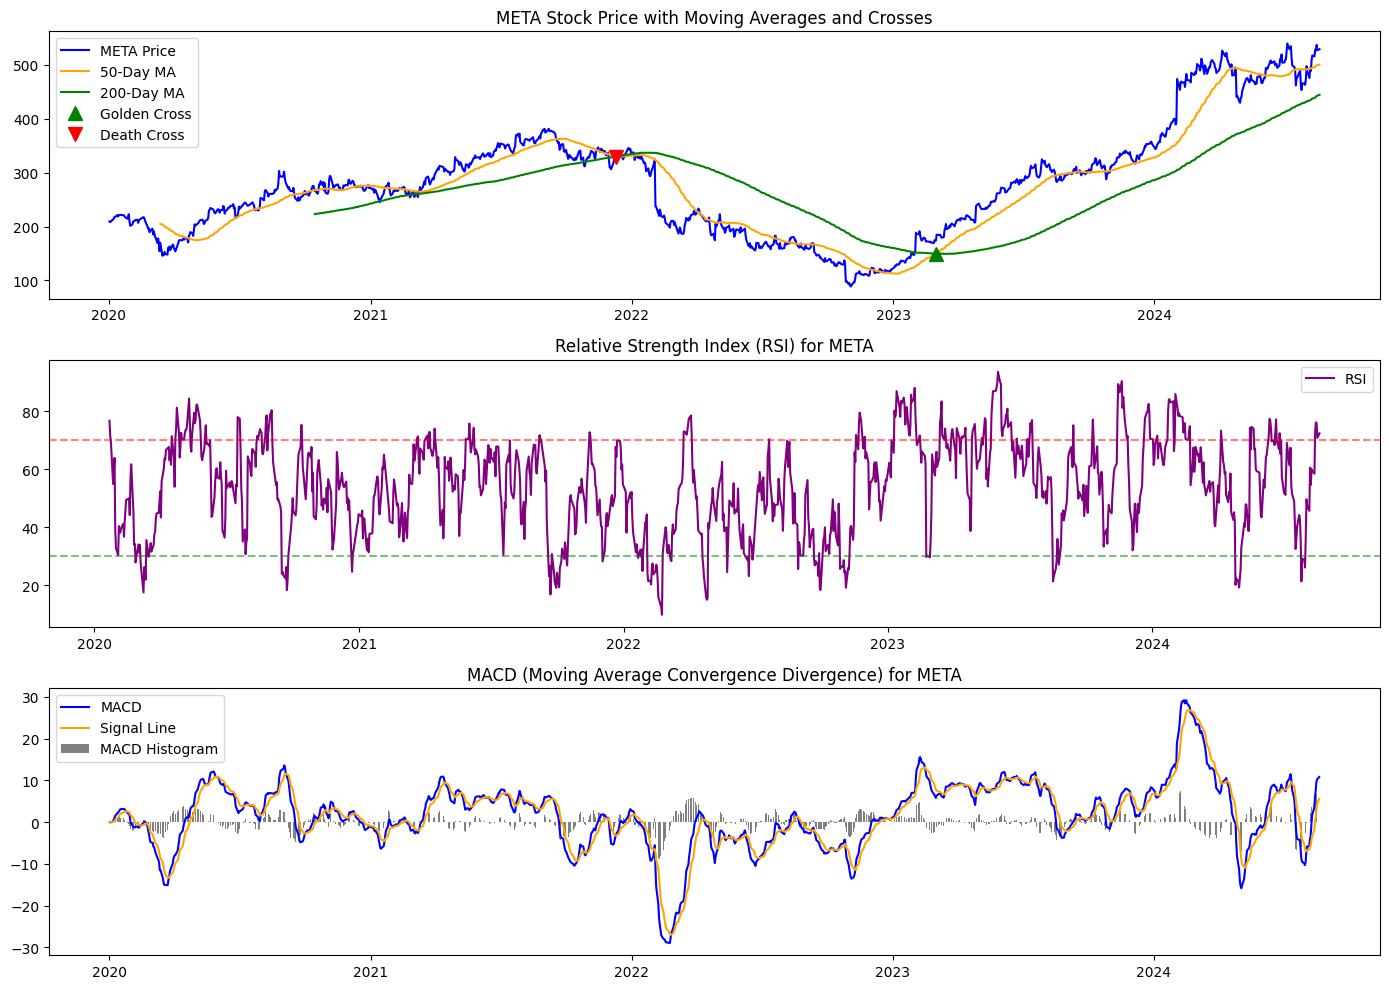

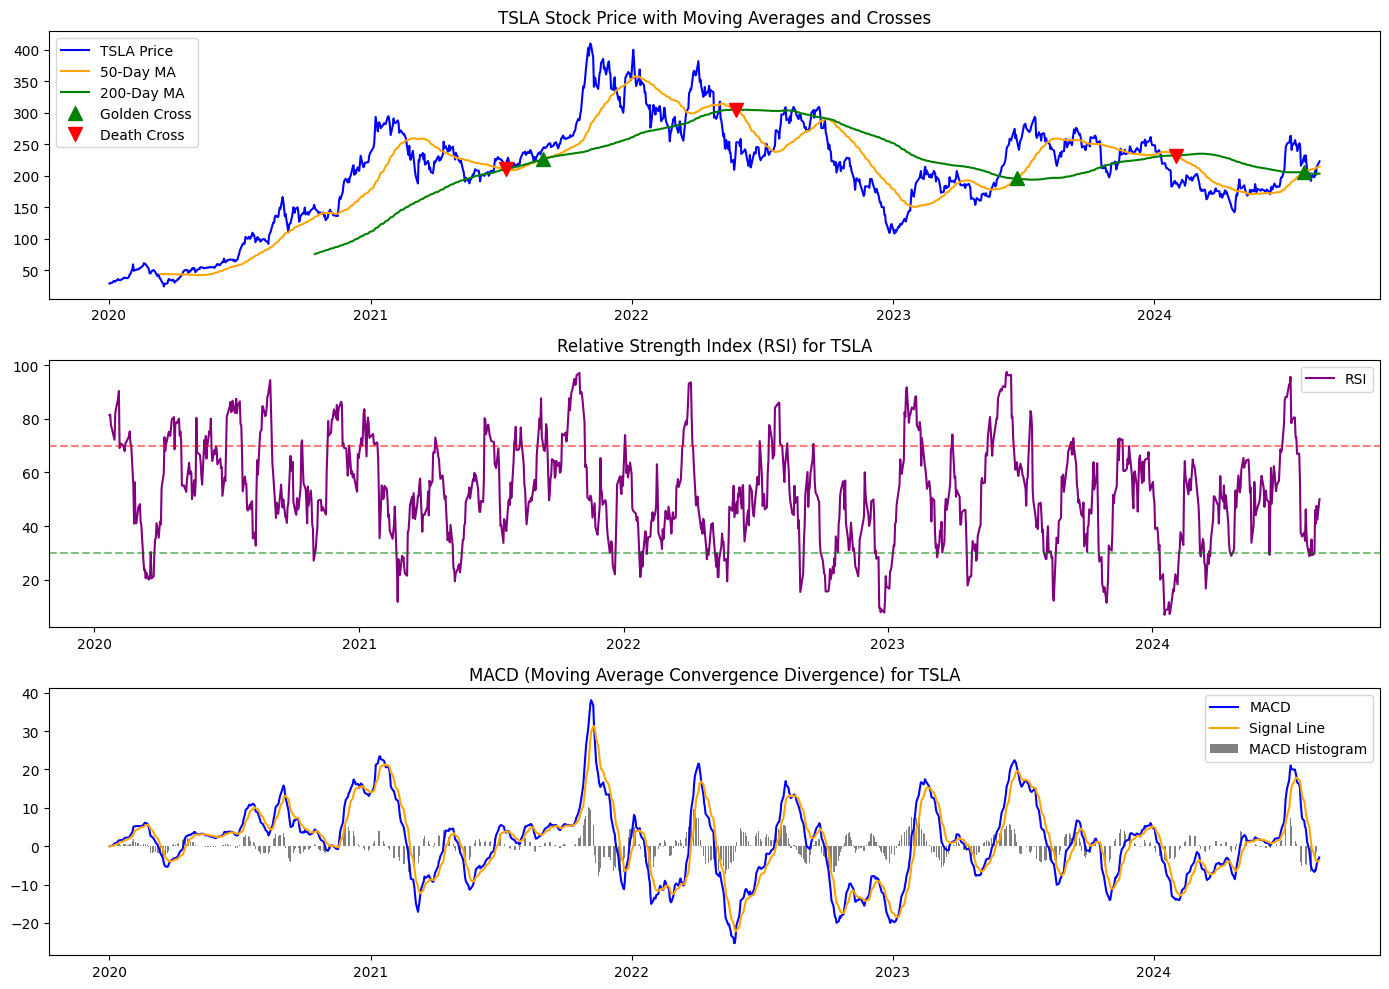

In [11]:
import matplotlib.pyplot as plt

for ticker in tickers:
    data = stock_data[ticker]

    plt.figure(figsize=(14, 10))

    # 1. 주가 및 이동 평균, 골든 크로스와 데드 크로스 표시
    plt.subplot(3, 1, 1)
    plt.plot(data['Adj Close'], label=f'{ticker} Price', color='blue')
    plt.plot(data['50_MA'], label='50-Day MA', color='orange')
    plt.plot(data['200_MA'], label='200-Day MA', color='green')

    plt.plot(data[data['Golden_Cross']].index, data['50_MA'][data['Golden_Cross']], '^', markersize=10, color='g', lw=0, label='Golden Cross')

    plt.plot(data[data['Death_Cross']].index, data['50_MA'][data['Death_Cross']], 'v', markersize=10, color='r', lw=0, label='Death Cross')

    plt.title(f'{ticker} Stock Price with Moving Averages and Crosses')
    plt.legend()

    # 2. RSI 그래프
    plt.subplot(3, 1, 2)
    plt.plot(data['RSI'], label='RSI', color='purple')
    plt.axhline(70, linestyle='--', alpha=0.5, color='red')
    plt.axhline(30, linestyle='--', alpha=0.5, color='green')
    plt.title(f'Relative Strength Index (RSI) for {ticker}')
    plt.legend()

    # 3. MACD 그래프
    plt.subplot(3, 1, 3)
    plt.plot(data['MACD'], label='MACD', color='blue')
    plt.plot(data['Signal_Line'], label='Signal Line', color='orange')
    plt.bar(data.index, data['MACD'] - data['Signal_Line'], label='MACD Histogram', color='gray')
    plt.title(f'MACD (Moving Average Convergence Divergence) for {ticker}')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [12]:
for ticker in tickers:
    data = stock_data[ticker]

    golden_cross_dates = data[data['Golden_Cross']].index
    death_cross_dates = data[data['Death_Cross']].index

    print(f"{ticker} Golden Cross Dates:")
    for date in golden_cross_dates:
        print(date.strftime('%Y-%m-%d'))

    print(f"\n{ticker} Death Cross Dates:")
    for date in death_cross_dates:
        print(date.strftime('%Y-%m-%d'))

    print("\n" + "="*50 + "\n")


GOOGL Golden Cross Dates:
2023-05-03

GOOGL Death Cross Dates:
2022-03-09


MSFT Golden Cross Dates:
2023-03-20

MSFT Death Cross Dates:
2022-03-16


META Golden Cross Dates:
2023-03-02

META Death Cross Dates:
2021-12-10


TSLA Golden Cross Dates:
2021-08-30
2023-06-23
2024-07-29

TSLA Death Cross Dates:
2021-07-09
2022-05-26
2024-02-01


